<h1>Лабораторная работа 6</h1>

<h2>Жээнбеков Эрбол AIN-1-21</h2>

<h3>Цель работы: познакомиться с методом перекрестной проверки модели – надежным способом обобщающей способности для классификации и регрессии; рассмотреть метод решетчатого поиска (grid search), предназначенный для корректировки параметров модели для получения наилучшей обобщающей способности моделей контролируемого машинного обучения.</h3>

<h2>Виды перекрестных проверок</h2>

<h3>Перекрестная проверка</h3>

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

data_breast_cancer = load_breast_cancer()
log_reg = LogisticRegression(max_iter=5000)

scores = cross_val_score(log_reg, data_breast_cancer.data, data_breast_cancer.target, cv=5)
print(f"Cross-validation scores: {scores}")

Cross-validation scores: [0.93859649 0.94736842 0.98245614 0.92982456 0.95575221]


In [9]:
print("Средняя правильность перекрестной проверки: {:.2f}".format(scores.mean()))

Средняя правильность перекрестной проверки: 0.95


In [10]:
from sklearn.model_selection import cross_validate
res = cross_validate(log_reg, data_breast_cancer.data, data_breast_cancer.target, cv=5, return_train_score=True)

display(res)

{'fit_time': array([0.46402144, 0.39928246, 0.52953339, 0.48630786, 0.51683164]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([0.93859649, 0.94736842, 0.98245614, 0.92982456, 0.95575221]),
 'train_score': array([0.96043956, 0.96043956, 0.95384615, 0.97362637, 0.95833333])}

In [11]:
import pandas as pd

res_df = pd.DataFrame(res)
display(res_df)
print("Mean {}".format(res_df.mean()))

,fit_time,score_time,test_score,train_score
0,0.464021,0.0,0.938596,0.960440
1,0.399282,0.0,0.947368,0.960440
2,0.529533,0.0,0.982456,0.953846
3,0.486308,0.0,0.929825,0.973626
4,0.516832,0.0,0.955752,0.958333


Mean fit_time       0.479195
score_time     0.000000
test_score     0.950800
train_score    0.961337
dtype: float64


<h3>Стратифицированная k-блочная перекрестная проверка и другие стратегии</h3>

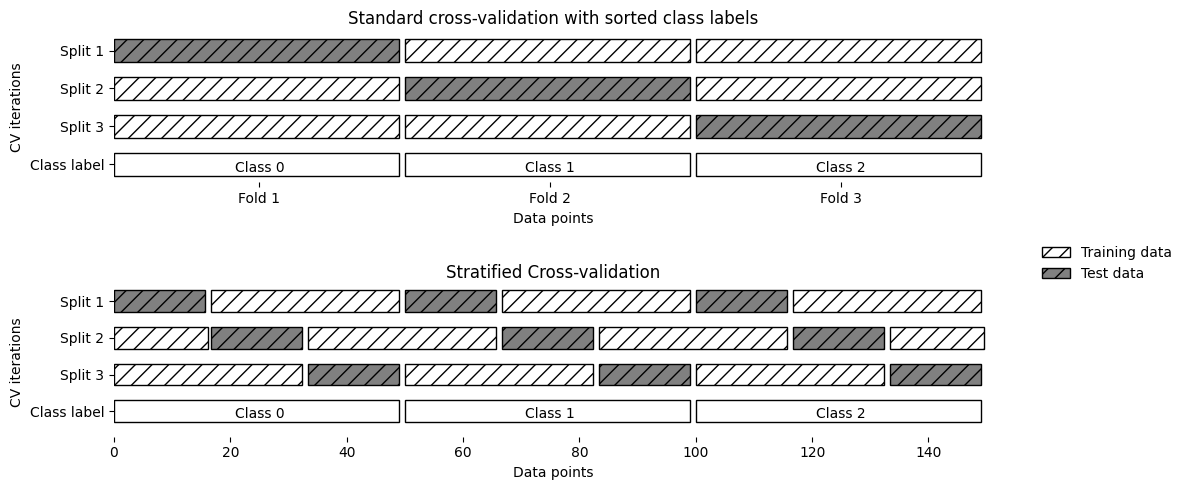

In [13]:
import mglearn

mglearn.plots.plot_stratified_cross_validation()

<h3>Перекрестная проверка с исключением по одному</h3>

In [14]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(log_reg, data_breast_cancer.data, data_breast_cancer.target, cv=loo)

print(f"Количество итераций: {len(scores)}")
print("Средняя правильность: {:.2f}".format(scores.mean()))

Количество итераций: 569
Средняя правильность: 0.95


<h3>Перекрестная проверка со случайными перестановками при разбиении</h3>

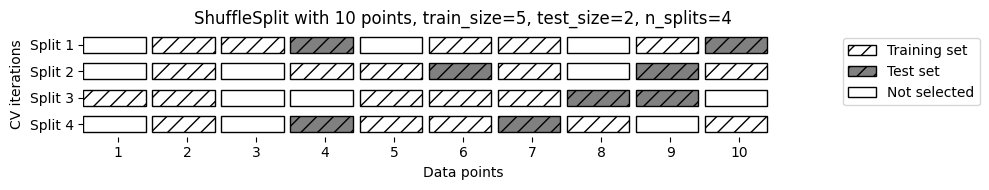

In [15]:
mglearn.plots.plot_shuffle_split()

In [18]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.3, train_size=.7, n_splits=10)
scores = cross_val_score(log_reg, data_breast_cancer.data, data_breast_cancer.target, cv=shuffle_split)
print(f"Значения правильности перекрестной проверки:\n{scores}")

Значения правильности перекрестной проверки:
[0.93567251 0.94152047 0.93567251 0.92397661 0.95321637 0.96491228
 0.95321637 0.97660819 0.95321637 0.95906433]


<h3>Перекрестная проверка с использованием групп</h3>

In [21]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=12, random_state=0)

groups = [1,0,1,0,1,1,3,2,1,3,2,3]
scores = cross_val_score(log_reg, X, y, groups=groups, scoring=None, cv=GroupKFold(n_splits=3))
print(f"Значения правильности перекрестной проверки:\n{scores}")

Значения правильности перекрестной проверки:
[0.8        0.66666667 0.75      ]


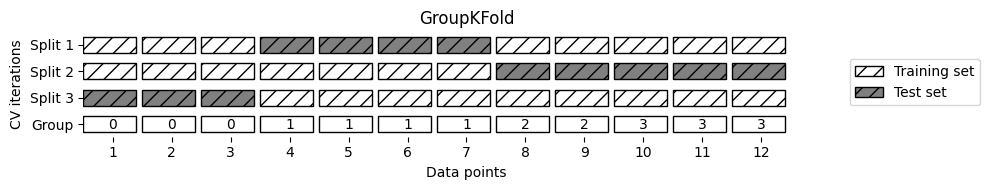

In [22]:
mglearn.plots.plot_group_kfold()

<h3>Простой решетчатый поиск</h3>

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_breast_cancer.data, data_breast_cancer.target, random_state=0)
print(f"Размер обучающего набора: {X_train.shape[0]}, размер тестового набора: {X_test.shape[0]}")
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma)
        svm.fit(X_train, y_train)
        
        score = svm.score(X_test, y_test)
        
        if score > best_score:
            best_score = score
            best_parametres = {'C': C, ' gamma':gamma}

print("Наилучшее знрачение правильности: {:.2f}".format(best_score))
print(f"Наилучшеие значения параметры: {best_parametres}")    

Размер обучающего набора: 426, размер тестового набора: 143
Наилучшее знрачение правильности: 0.93
Наилучшеие значения параметры: {'C': 0.001, ' gamma': 0.001}


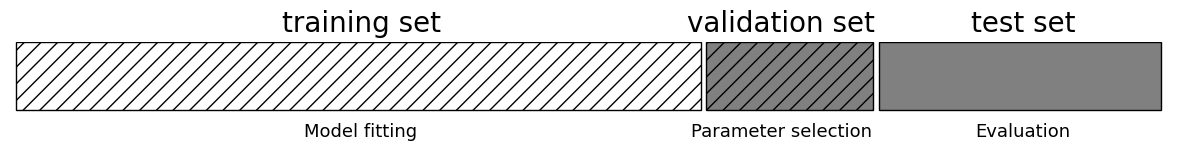

In [25]:
mglearn.plots.plot_threefold_split()

In [30]:
from sklearn.svm import SVC 
# разбиваем данные на обучающий+проверочный набор и тестовый набор 
X_trainval, X_test, y_trainval, y_test = train_test_split(data_breast_cancer.data, data_breast_cancer.target, random_state=0) 
# разбиваем обучающий+проверочный набор на обучающий и проверочный наборы 
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1) 
print("Размер обучающего набора: {} размер проверочного набора: {} размер тестового набора:" " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0])) 

best_score = 0 
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:     
    for C in [0.001, 0.01, 0.1, 1, 10, 100]: 
        # для каждой комбинации параметров обучаем SVC         
        svm = SVC(gamma=gamma, C=C)         
        svm.fit(X_train, y_train) 
        # оцениваем качество SVC на тестовом наборе         
        score = svm.score(X_valid, y_valid) 
        # если получаем наилучшее значение правильности, сохраняем значение и параметры 
        if score > best_score:             
            best_score = score 
            best_parameters = {'C': C, 'gamma': gamma} 
# заново строим модель на наборе, полученном в результате объединения обучающих
# и проверочных данных, оцениваем качество модели на тестовом наборе 
svm = SVC(**best_parameters) 
svm.fit(X_trainval, y_trainval) 
test_score = svm.score(X_test, y_test) 
print("Лучшее значение правильности на проверочном наборе: {:.2f}".format(best_score)) 
print("Наилучшие значения параметров: ", best_parameters)
print("Правильность на тестовом наборе с наилучшими параметрами: {:.2f}".format(test_score)) 

Размер обучающего набора: 319 размер проверочного набора: 107 размер тестового набора: 143

Лучшее значение правильности на проверочном наборе: 0.94
Наилучшие значения параметров:  {'C': 1, 'gamma': 0.001}
Правильность на тестовом наборе с наилучшими параметрами: 0.93


<h2>Метрики</h2>

In [31]:
y= data_breast_cancer.target == 9
X_train, X_test, y_train, y_test = train_test_split( data_breast_cancer.data, y, random_state=0)

In [32]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Правильность на тестовом наборе {:.2f}".format(tree.score(X_test, y_test)))

Правильность на тестовом наборе 1.00


<h1>Создание модели классификатора</h1>

In [34]:
import random

def generate_random_data():
    salary = random.randint(35000, 2000000)
    cities = ['New York', 'Dubai', 'Antalya', 'Seoul', 'Paris', 'London']
    city = random.choice(cities)
    age = random.randint(18, 65)
    vacation_preferences = ['City Tour', 'Shopping', 'Beach']
    vacation_prefer = random.choice(vacation_preferences)
    transport_preferences = ['Car', 'Train', 'Airplane']
    transport_prefer = random.choice(transport_preferences)
    target = random.choice([0, 1])  

    return salary, city, age, vacation_prefer, transport_prefer, target

data = [generate_random_data() for _ in range(1000)]

columns = ['salary', 'city', 'age', 'vacation_prefer', 'transport_prefer', 'target']
my_df = pd.DataFrame(data, columns=columns)

print(my_df.head(10))

    salary      city  age vacation_prefer transport_prefer  target
0   956915   Antalya   60       City Tour            Train       1
1  1813544     Dubai   44        Shopping              Car       1
2  1606862  New York   52        Shopping            Train       1
3  1671946     Seoul   31        Shopping            Train       0
4   975328    London   21       City Tour         Airplane       0
5  1835287     Seoul   53           Beach              Car       0
6  1912371     Seoul   21       City Tour            Train       1
7  1122360     Dubai   33       City Tour              Car       1
8  1633631   Antalya   26        Shopping            Train       0
9   707635  New York   36           Beach            Train       0


In [35]:
df_encoded = pd.get_dummies(my_df, columns=['city', 'vacation_prefer', 'transport_prefer'])

print(df_encoded.head(10))

    salary  age  target  city_Antalya  city_Dubai  city_London  city_New York  \
0   956915   60       1          True       False        False          False   
1  1813544   44       1         False        True        False          False   
2  1606862   52       1         False       False        False           True   
3  1671946   31       0         False       False        False          False   
4   975328   21       0         False       False         True          False   
5  1835287   53       0         False       False        False          False   
6  1912371   21       1         False       False        False          False   
7  1122360   33       1         False        True        False          False   
8  1633631   26       0          True       False        False          False   
9   707635   36       0         False       False        False           True   

   city_Paris  city_Seoul  vacation_prefer_Beach  vacation_prefer_City Tour  \
0       False       False    

In [59]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [81]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)

test_accuracy_rf = random_forest.score(X_test, y_test)

print(f"Правильность на тестовых данных (Random Forest): {test_accuracy_rf}")

Accuracy on the training dataset (Random Forest): 1.0
Accuracy on the test dataset (Random Forest): 0.505


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 

# Split the data into training+validation set and test set 
X_trainval, X_test, y_trainval, y_test = train_test_split(df_encoded.drop('target', axis=1), df_encoded['target'], random_state=0)

# Further split the training+validation set into training set and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Размер обучающего набора: {} размер проверочного набора: {} размер тестового набора: {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0])) 

best_score = 0 
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:     
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:         
        # For each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)         
        svm.fit(X_train, y_train)         
        # Evaluate the performance of SVC on the validation set         
        score = svm.score(X_valid, y_valid)         
        # If the current model performs better, store the parameters 
        if score > best_score:             
            best_score = score 
            best_parameters = {'C': C, 'gamma': gamma} 

# Rebuild the model using the combined training and validation data 
svm = SVC(**best_parameters) 
svm.fit(X_trainval, y_trainval) 
test_score = svm.score(X_test, y_test) 

print("Лучшее значение правильности на проверочном наборе: {:.2f}".format(best_score))
print("Наилучшие значения параметров: ", best_parameters)
print("Правильность на тестовом наборе с наилучшими параметрами: {:.2f}".format(test_score)) 

Размер обучающего набора: 562 размер проверочного набора: 188 размер тестового набора: 250

Лучшее значение правильности на проверочном наборе: 0.51
Наилучшие значения параметров:  {'C': 1, 'gamma': 0.001}
Правильность на тестовом наборе с наилучшими параметрами: 0.53


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df_encoded.drop('target', axis=1)
y = df_encoded['target'] == 9  # Convert to boolean

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

pred_tree = tree.predict(X_test)

accuracy = tree.score(X_test, y_test)
print("Правильность на тестовом наборе: {:.2f}".format(accuracy))

Правильность на тестовом наборе: 1.00


In [86]:
param_grid = {'C':[0.001,0.01, 0.1,1,10,100],
            'gamma':[
                0.001,0.01, 0.1,1,10,100
            ]}
print("Сетка параметров: {}".format(param_grid))

Сетка параметров: {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


<h3>Решетчатый поиск</h3>

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv=5)

from sklearn.model_selection import GridSearchCV, train_test_split

X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search.fit(X_train, y_train)

0.528
